<h2>Analysis 6. Directionality of editing site clusters</h2>
<p>We assesed whether there is directionality to the editing site clusters in the sense of higher EL of the upstream/downstream editing site in the clusters of two editing sites</p>

In [2]:
import numpy as np
from scipy import stats
from editing_adlib import *
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def edclust_direct(edsite_crd_dict, orf_crd_dict, size_two=True):
    diff_dist = [[],[],[]]
    for gene_id in edsite_crd_dict.keys():
        orfstart = orf_crd_dict[gene_id][0]
        for crd in edsite_crd_dict[gene_id].keys():
            if edsite_crd_dict[gene_id].get(crd + 1):
                if size_two and \
                (edsite_crd_dict[gene_id].get(crd + 2) or \
                edsite_crd_dict[gene_id].get(crd - 1)):
                    continue
                frame = (crd - orfstart)%3
                val_left = eval(edsite_crd_dict[gene_id][crd][7])
                val_right = eval(edsite_crd_dict[gene_id][crd + 1][7])
                diff_dist[frame].append(val_left - val_right)
    
    for frame in range(3):
    
        diff_dist[frame] = np.array(diff_dist[frame])
        
        mean_diff = round(np.mean(diff_dist[frame]), 6)
        std_diff = round(np.std(diff_dist[frame]), 6)
        
        t, p = stats.wilcoxon(diff_dist[frame])
        
        print("{}\t{}\t{}\t{}".format(frame, mean_diff, std_diff, p))
    return diff_dist

In [5]:
orf_crd_dict_oct = read_orf_crd_file("../data/oct_orf_crds.txt")
orf_crd_dict_bim = read_orf_crd_file("../data/bim_orf_crds.txt")
orf_crd_dict_sep = read_orf_crd_file("../data/sep_orf_crds.txt")
orf_crd_dict_squ = read_orf_crd_file("../data/squ_orf_crds.txt")

edsites_oct = read_edsite_crd_file("../data/editing_sites_oct_plus.txt", syn_nsyn = None)
edsites_bim = read_edsite_crd_file("../data/editing_sites_bim_plus.txt", syn_nsyn = None)
edsites_sep = read_edsite_crd_file("../data/editing_sites_sep_plus.txt", syn_nsyn = None)
edsites_squ = read_edsite_crd_file("../data/editing_sites_squ_plus.txt", syn_nsyn = None)

diff_dist_oct = edclust_direct(edsites_oct, orf_crd_dict_oct)
diff_dist_bim = edclust_direct(edsites_bim, orf_crd_dict_bim)
diff_dist_sep = edclust_direct(edsites_sep, orf_crd_dict_sep)
diff_dist_squ = edclust_direct(edsites_squ, orf_crd_dict_squ)

0	-4.768262	19.124919	8.51660880978413e-39
1	-3.999935	21.982675	3.209465149036477e-36
2	-2.304557	14.914374	4.77506404293694e-43
0	-6.025283	19.800549	1.2388261478476222e-34
1	-4.500378	23.168436	9.375512907982424e-29
2	-2.120751	15.910338	7.852544809267939e-23
0	-4.159304	17.610217	1.151723873215292e-31
1	-4.463292	20.877688	1.3851897254534802e-62
2	-2.3173	15.131737	1.6998139187919555e-51
0	-9.080649	26.138276	1.276806331118097e-47
1	-6.432352	30.34241	1.7416810240375073e-39
2	-2.298938	24.855387	3.143584732127131e-19


0	-4.768262	19.124919	8.51660880978413e-39
1	-3.999935	21.982675	3.209465149036477e-36
2	-2.304557	14.914374	4.77506404293694e-43


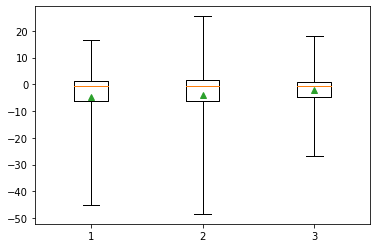

In [6]:
orf_crd_dict = read_orf_crd_file("../data/oct_orf_crds.txt")
diff_dist_oct = edclust_direct(edsites_oct, orf_crd_dict)
plt.boxplot(diff_dist_oct, 0, '', whis = [5,95], showmeans=True)
plt.savefig("../article/main_figures/fig3/EL_direct.pdf")
plt.show()

oct


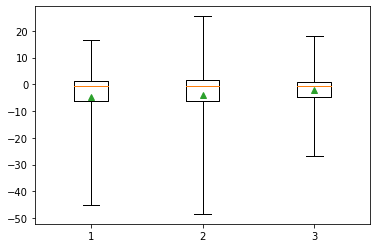

bim


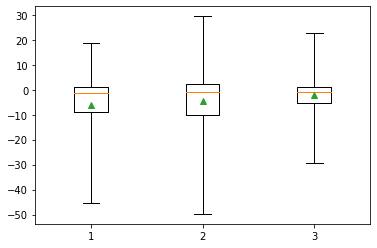

sep


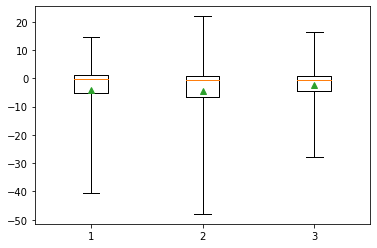

squ


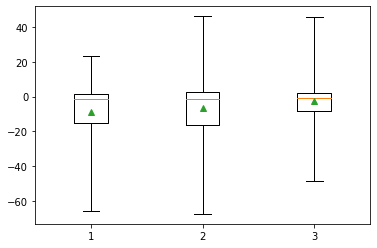

In [11]:
list_vals = [diff_dist_oct, \
             diff_dist_bim, \
             diff_dist_sep, \
             diff_dist_squ]

spec_arr = ["oct","bim","sep","squ"]

c = 0
for diff_dist in list_vals:
    print(spec_arr[c])
    plt.boxplot(diff_dist, 0, '', whis = [5,95], showmeans=True)
    plt.savefig(f"../article/suppl_figures/An6_edclust_dir/EL_direct_{spec_arr[c]}.pdf")
    plt.show()
    c += 1